### Librairies import

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from pathlib import Path
import cv2
from tqdm import tqdm

from scipy import ndimage as ndi
from skimage.segmentation import watershed, felzenszwalb
from skimage.filters import sobel
from skimage.filters import rank
from skimage.morphology import disk
import sklearn.metrics

### Datasets import

In [2]:
from utils import get_data, plot_slice_seg, rand_index_dataset, prediction_to_df

In [3]:
X_train, X_test, y_train = get_data()

#### X_train collected ####
#### X_test collected ####
#### y_train collected ####


### Data display

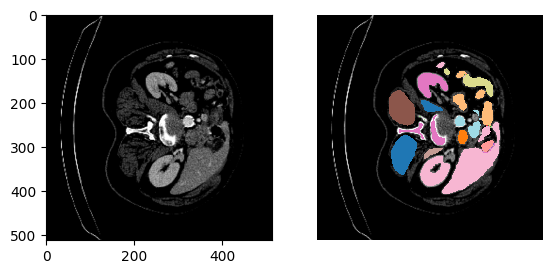

In [4]:
plot_slice_seg(X_train[0], y_train.iloc[0].values.reshape((512,512)))

### Felzenszwalb Model

In [89]:
def felzenszwalb_one_sample(data_slice):
    label_predicted = felzenszwalb(data_slice, scale=10, sigma=0.2, min_size=2000)
    return label_predicted

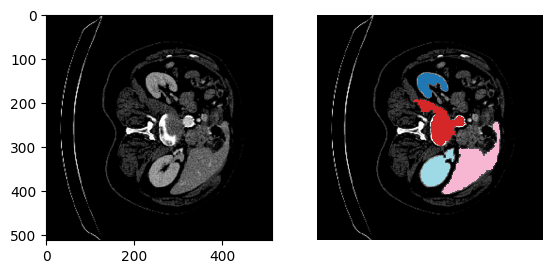

In [90]:
plot_slice_seg(X_train[0], felzenszwalb_one_sample(X_train[0]))

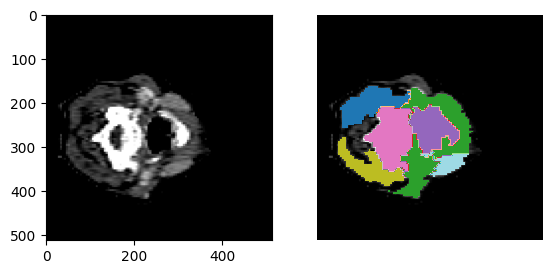

In [91]:
plot_slice_seg(X_train[10], felzenszwalb_one_sample(X_train[10]))

### Baselin Performances 

In [94]:
np.shape(data_val)

(200, 512, 512)

In [101]:
# Compute the baseline on a whole dataset
def compute_felzenszwalb(dataset: np.array):
    labels_predicted_list = []
    s = 0
    for index in range(np.shape(dataset)[0]):
        data_slice = dataset[index]
        label_predicted = felzenszwalb_one_sample(data_slice)
        labels_predicted_list.append(label_predicted)
        if s%20 == 0:
            print(f"Image {s}/200 processed")
    return pd.DataFrame(np.stack(labels_predicted_list, axis=0).reshape((len(labels_predicted_list), -1)))

In [96]:
# Let's create a validation set first: the 200 first images of the train set 
data_val = X_train[:200]
labels_val = y_train.iloc[:200]

In [100]:
# Compute baseline on a few train data
labels_val_predicted_felzenszwalb = compute_felzenszwalb(data_val)

In [102]:
# Compute the metric on the validation set
rand_index_dataset(labels_val, labels_val_predicted_felzenszwalb.sample(200))
# We get => 0.27 (0.270633377755745); Not so bad, but room for improvements!
# Let's see if you can do better!

0.08183710773833625